## <span style="color:orange">Techniques: </span>
- Decision tree
- Random Forest tree
- Logistic Regression

### <span style="color:purple">**Dataset: Breast-Cancer Prediction !**</span>

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

In [42]:
# import Dataset !
import pandas as pd

df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [43]:
X = df.drop('diagnosis', axis=1)
y = df[['diagnosis']]

In [44]:
X.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.8,1001.0,0.11840
1,20.57,17.77,132.9,1326.0,0.08474


In [45]:
y.head(2)

,diagnosis
0,0
1,0


### <span style="color:cyan">Step: 02</span>: Data Normalize

In [46]:
# transformation !
from sklearn.preprocessing import MinMaxScaler

feature = X.columns
scaling = MinMaxScaler()
df[feature] = scaling.fit_transform(df[feature])
X = df[feature]
X.head(3)


# # transformation !
# from sklearn.preprocessing import MinMaxScaler
# feature = [i for i in df.columns if i not in ['diagnosis']]
# scaling = MinMaxScaler()
# df[feature] = scaling.fit_transform(df[feature])

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,0.521037,0.022658,0.545989,0.363733,0.593753
1,0.643144,0.272574,0.615783,0.501591,0.289880
2,0.601496,0.390260,0.595743,0.449417,0.514309


### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

In [47]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [48]:
# plots !
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
print("Before Cleaning:", df.shape)

Before Cleaning: (569, 6)


***

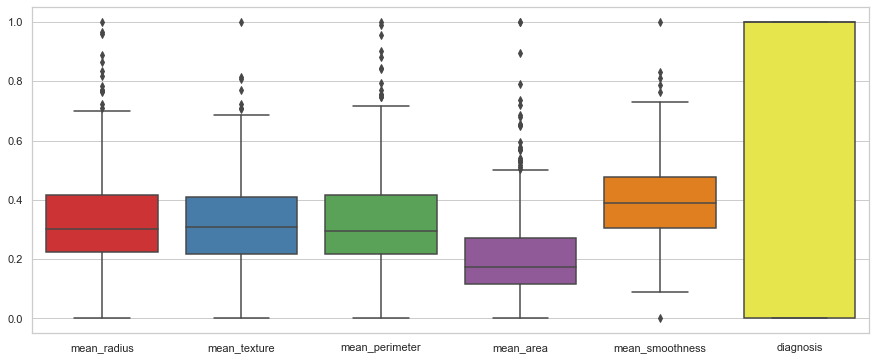

In [50]:
# mean_radius

plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            palette="Set1")
plt.show()            

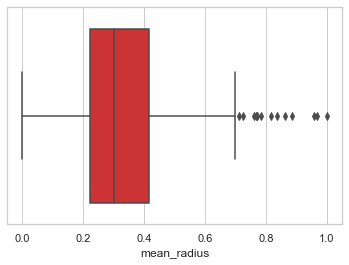

In [51]:
# mean_radius

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_radius",
            palette="Set1")
plt.show()            

In [52]:
df = df[df['mean_radius']<0.65] 


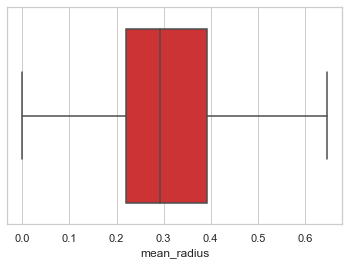

In [53]:
# mean_radius

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_radius",
            palette="Set1")
plt.show()            

In [54]:
df.shape

(544, 6)

***

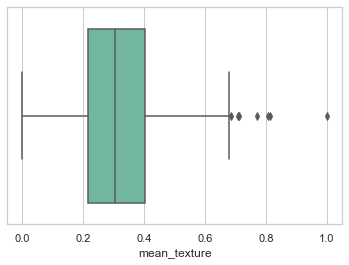

In [55]:
# mean_texture

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_texture",
            palette="Set2")
plt.show()            

In [56]:
df = df[df['mean_texture']<0.66] 


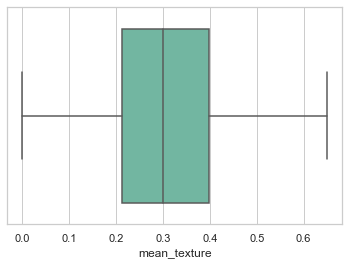

In [57]:
# mean_texture

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_texture",
            palette="Set2")
plt.show()            

In [58]:
df.shape

(532, 6)

***

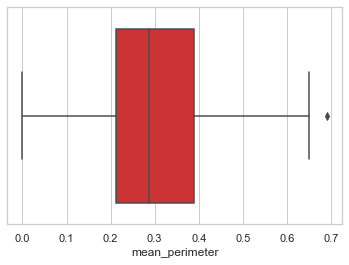

In [59]:
# mean_perimeter

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_perimeter",
            palette="Set1")
plt.show()            

In [60]:
df = df[df['mean_perimeter']<0.66]

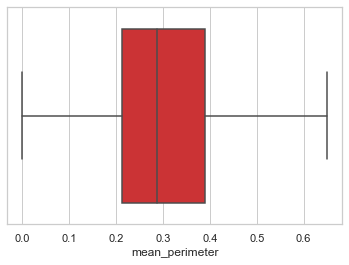

In [61]:
# mean_perimeter

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_perimeter",
            palette="Set1")
plt.show()            

In [62]:
df.shape

(531, 6)

***

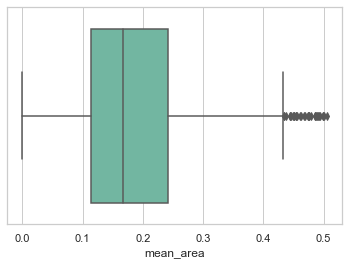

In [63]:
# mean_area

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_area",
            palette="Set2")
plt.show()            

In [64]:
df = df[df['mean_area']<0.35]

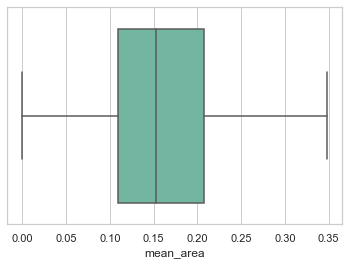

In [65]:
# mean_area

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_area",
            palette="Set2")
plt.show()            

In [66]:
df.shape

(458, 6)

***

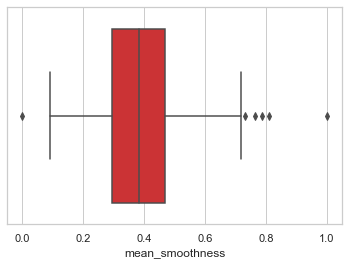

In [67]:
# mean_smoothness

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_smoothness",
            palette="Set1")
plt.show()            

In [68]:
# df = (df['mean_smoothness']>0.06 and df['mean_smoothness']<0.13)

df = df[df['mean_smoothness']>0.1]
df = df[df['mean_smoothness']<0.7]


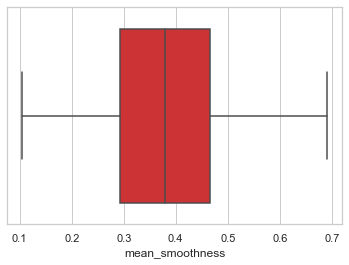

In [69]:
# mean_smoothness

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="mean_smoothness",
            palette="Set1")
plt.show()            

In [70]:
print("After Cleaning:", df.shape)

After Cleaning: (450, 6)


***

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### <span style="color:cyan">Step: 05</span>: Fit Decision tree Technique !

In [72]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train, y_train)
model


DecisionTreeClassifier()

### <span style="color:cyan">Step: 06</span>: Evaluate or Test Model Accuracy

In [73]:
predicted_values = model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Decision tree:", score)


Decision tree: 87.72


***

***

### <span style="color:cyan">Step: 05</span>: Random Forest tree !

In [74]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)
model


C:\Users\fahad\AppData\Local\Temp\ipykernel_1276\334895486.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

### <span style="color:cyan">Step: 06</span>: Evaluate or Test Model Accuracy

In [75]:
predicted_values = model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Random Forest:", score)


Random Forest: 92.98


***

***

### <span style="color:cyan">Step: 05</span>: Fit Logistic Regression !

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
model


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### <span style="color:cyan">Step: 06</span>: Evaluate or Test Model Accuracy

In [77]:
import numpy as np

score = np.round(model.score(X_test, y_test)*100, 2)
print("Logistic Regression:", score)


Logistic Regression: 92.98


***

***

***